In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
car=pd.read_csv('CarPrice_Assignment.csv')

In [28]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
#Check the data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
car.duplicated().sum()

0

In [33]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [34]:
print("Length of unique values in each column:")
print(car.nunique())

Length of unique values in each column:
car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64


In [35]:
#Data preprocessing
len(car['car_ID'])

205

In [36]:
#drop car_ID column
car.drop(['car_ID'],axis=1,inplace=True)

Unique values in CarName : ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick 

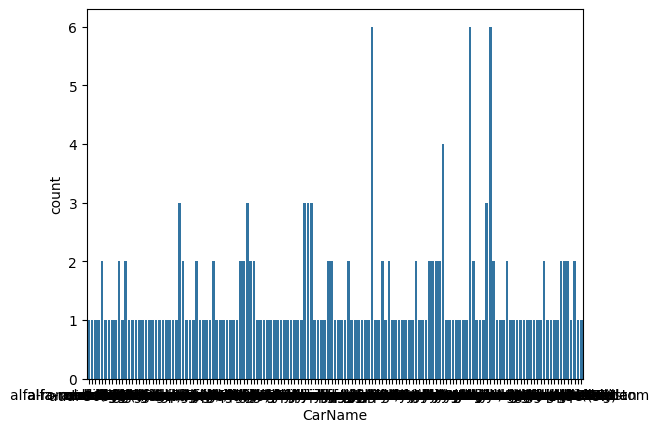

Unique values in fueltype : ['gas' 'diesel']


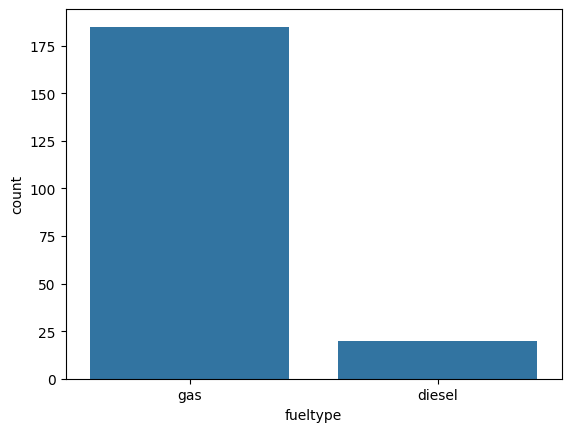

Unique values in aspiration : ['std' 'turbo']


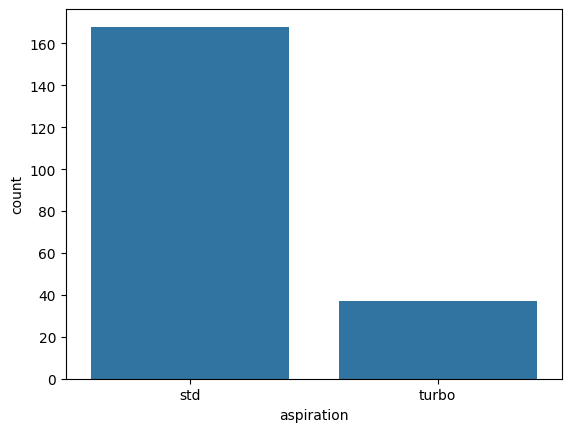

Unique values in doornumber : ['two' 'four']


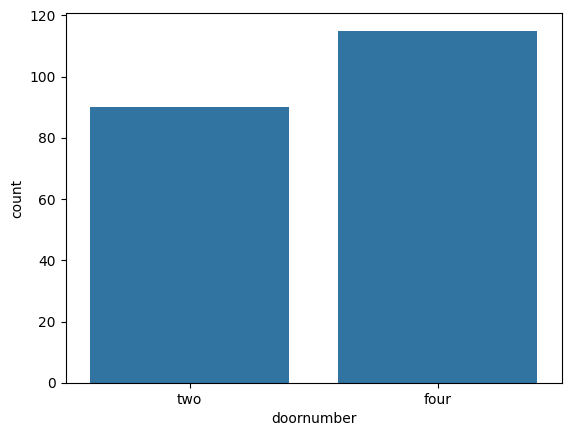

Unique values in carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


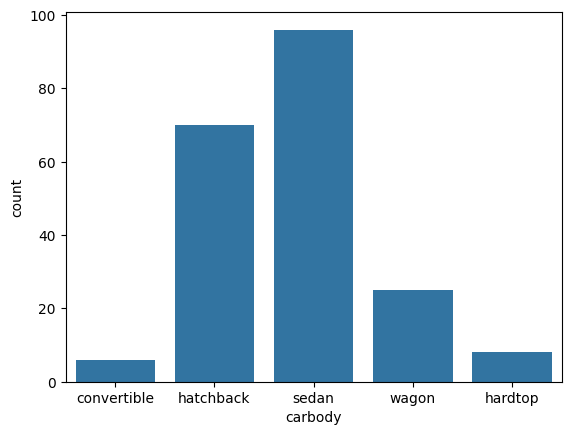

Unique values in drivewheel : ['rwd' 'fwd' '4wd']


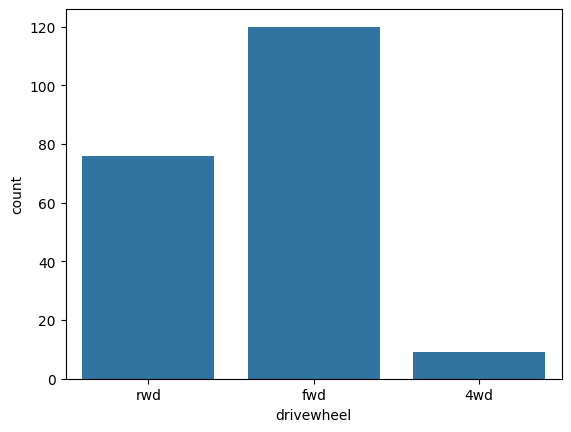

Unique values in enginelocation : ['front' 'rear']


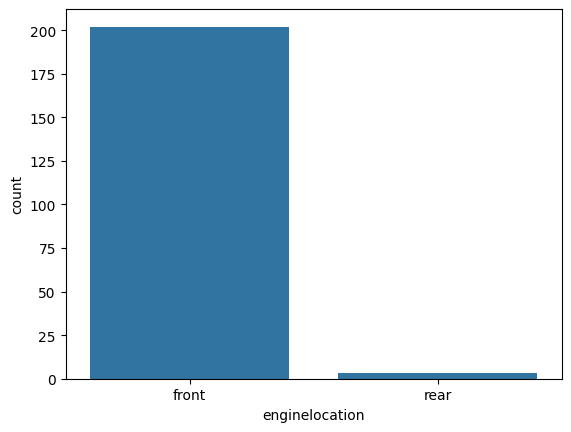

Unique values in enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


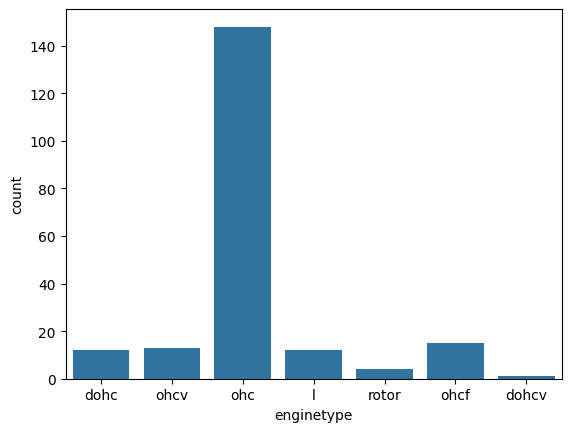

Unique values in cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


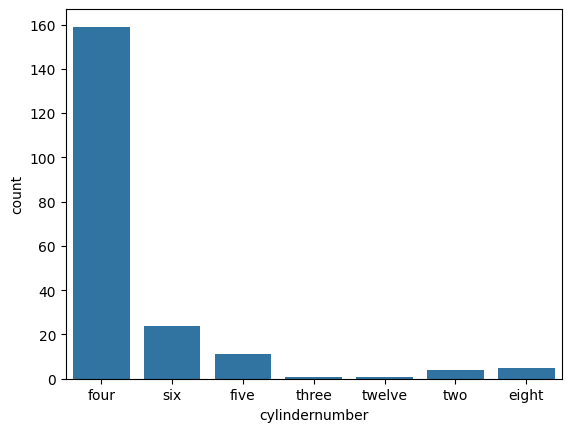

Unique values in fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


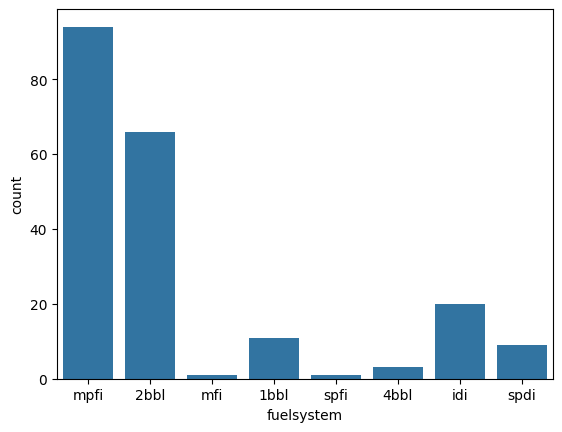

In [40]:
#check unique values
categorical_cols = car.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print("Unique values in", col, ":", car[col].unique())
    # Alternatively, you can plot count plots using seaborn
    sns.countplot(x=col, data=car)
    plt.show()
    

In [41]:
car['company'] = car.CarName.str.split(expand=True)[0]

In [42]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [44]:
car['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [48]:
car.replace(['maxda','nissan','porcshce','toyouta','vokswagen','vw'],['mazda','Nissan', 'porsche','toyota','volkswagen','volkswagen'],inplace=True)
car['company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [55]:
#Label encoding all the categorical columns
label_encoder =LabelEncoder()


In [56]:
car['symboling']=label_encoder.fit_transform(car['symboling'])
car['fueltype']=label_encoder.fit_transform(car['fueltype'])
car['aspiration']=label_encoder.fit_transform(car['aspiration'])
car['doornumber']=label_encoder.fit_transform(car['doornumber'])
car['carbody']=label_encoder.fit_transform(car['carbody'])
car['drivewheel']=label_encoder.fit_transform(car['drivewheel'])
car['enginelocation']=label_encoder.fit_transform(car['enginelocation'])
car['company']=label_encoder.fit_transform(car['company'])

In [59]:
print(len(car.columns))
car.columns

25


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'company'],
      dtype='object')

In [68]:
x=car[['symboling','fueltype','doornumber','carbody','carheight','stroke','compressionratio','horsepower','peakrpm']]
y=car[['price']]
x.head()

,symboling,fueltype,doornumber,carbody,carheight,stroke,compressionratio,horsepower,peakrpm
0,5,1,1,0,48.8,2.68,9.0,111,5000
1,5,1,1,0,48.8,2.68,9.0,111,5000
2,3,1,1,2,52.4,3.47,9.0,154,5000
3,4,1,0,3,54.3,3.40,10.0,102,5500
4,4,1,0,3,54.3,3.40,8.0,115,5500


In [62]:
# Data splitting
x_train, x_test, y_train, y_test =train_test_split(x, y,test_size=0.2, random_state=42)


In [63]:
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)


x_train: (164, 9)
x_test: (41, 9)
y_train: (164, 1)
y_test: (41, 1)


In [64]:
#Model selection and implimentation(linear regression)
clf=LinearRegression()

In [65]:
#Model training
clf.fit(x_train,y_train)

LinearRegression()

In [66]:
#Model evaluation
clf.score(x_test,y_test)

0.7336639688788762

In [76]:
predict=clf.predict(x_test)
predict

array([[26509.46079206],
       [20163.49850494],
       [12180.16936641],
       [14768.67813649],
       [21536.33194345],
       [ 6749.35184124],
       [11413.17082434],
       [ 7425.94376095],
       [ 9438.11200199],
       [ 7715.05516485],
       [14329.66823829],
       [ 6864.99317081],
       [15978.47734715],
       [13875.09990033],
       [28135.75739443],
       [ 8771.41887546],
       [ 3311.75170744],
       [16513.88849531],
       [ 9099.76361619],
       [11104.24543605],
       [10847.12579752],
       [21795.36045164],
       [ 8536.19336069],
       [ 3827.34680729],
       [ 5267.82821024],
       [23222.32955849],
       [15862.84530876],
       [15018.17231503],
       [ 5243.02201384],
       [16407.04114304],
       [22315.31176042],
       [ 7194.88917874],
       [ 7458.04970435],
       [19021.51112867],
       [ 9984.12830379],
       [22950.82504235],
       [14737.61023199],
       [ 9198.94561397],
       [ 6682.5256158 ],
       [16513.88849531],


In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math 
math.sqrt(mean_squared_error(predict,y_test))


4585.37208979066